In [1]:
from fastai.vision import *
import os
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn import tree
from fastai.tabular import *

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import pandas as pd 

df = pd.read_csv("/content/TA_COVID19_RL.csv")

In [3]:
df.head()

,OBJECTID,ID,DATA_RICEVIMENTO_TAMPONE,FASCIA_DI_ETÀ,DOMICILIO_COMUNE,CODICE_COMUNE_DOMICILIO,CODICE_COMUNE,DESCRIZIONE_COMUNE,CODICE_PROVINCIA,PROVINCIA,VIVO_O_DECEDUTO,SESSO,REGIONE,ObjectId2
0,1,1,20200222,75+,BERGAMO,3016024.0,3016024.0,BERGAMO,BG,BERGAMO,DECEDUTO,M,LOMBARDIA,219
1,2,2,20200223,25-49,BONEMERSE,3019006.0,3019006.0,BONEMERSE,CR,CREMONA,VIVO,M,LOMBARDIA,221
2,3,3,20200227,25-49,CAMISANO,3019010.0,3019010.0,CAMISANO,CR,CREMONA,VIVO,M,LOMBARDIA,223
3,4,4,20200223,65-74,CAPPELLA CANTONE,3019013.0,3019013.0,CAPPELLA CANTONE,CR,CREMONA,VIVO,M,LOMBARDIA,225
4,5,5,20200304,25-49,CASALPUSTERLENGO,3098010.0,3098010.0,CASALPUSTERLENGO,LO,LODI,VIVO,M,LOMBARDIA,227


In [4]:
df.describe()

,OBJECTID,ID,DATA_RICEVIMENTO_TAMPONE,CODICE_COMUNE_DOMICILIO,CODICE_COMUNE,ObjectId2
count,64135.000000,64135.000000,6.413500e+04,6.277300e+04,6.277300e+04,64135.000000
mean,32068.000000,35477.332907,2.020034e+07,3.028223e+06,3.028223e+06,32068.000000
std,18514.324094,19507.587876,4.384994e+01,2.978475e+04,2.978475e+04,18514.324094
min,1.000000,1.000000,2.020022e+07,3.012002e+06,3.012002e+06,1.000000
25%,16034.500000,18598.500000,2.020032e+07,3.015146e+06,3.015146e+06,16034.500000
50%,32068.000000,35378.000000,2.020032e+07,3.017009e+06,3.017009e+06,32068.000000
75%,48101.500000,52413.500000,2.020040e+07,3.019030e+06,3.019030e+06,48101.500000
max,64135.000000,69183.000000,2.020042e+07,3.108055e+06,3.108055e+06,64135.000000


In [0]:
dep_var = 'VIVO_O_DECEDUTO'
cat_names = ['FASCIA_DI_ETÀ', 'DOMICILIO_COMUNE', 'PROVINCIA', 'SESSO']
procs = [FillMissing, Categorify, Normalize]

In [0]:
df.groupby('VIVO_O_DECEDUTO').count()
df.VIVO_O_DECEDUTO.fillna(value='VIVO', inplace=True)

In [0]:
data = (TabularList.from_df(df, cat_names=cat_names,  procs=procs)
                           .split_by_idx(list(range(29000,len(df))))
                           .label_from_df(cols=dep_var)
                           .databunch())

In [8]:
data.show_batch(rows=200)

FASCIA_DI_ETÀ,DOMICILIO_COMUNE,PROVINCIA,SESSO,target
65-74,SUELLO,LECCO,F,VIVO
75+,ZOGNO,BERGAMO,M,VIVO
75+,MONZA,MONZA E DELLA BRIANZA,M,DECEDUTO
50-64,ALBANO SANT'ALESSANDRO,BERGAMO,M,VIVO
75+,MILANO,MILANO,M,DECEDUTO
75+,BORGOSATOLLO,BRESCIA,M,DECEDUTO
50-64,GALLARATE,VARESE,M,VIVO
65-74,MARCALLO CON CASONE,MILANO,M,VIVO
75+,OSSONA,MILANO,M,VIVO
25-49,CARPENEDOLO,BRESCIA,M,VIVO


In [9]:
learn = tabular_learner(data, layers=[100,50,20,5], metrics=accuracy)
learn.fit(3, 1e-2)
learn.save('trained_model')

epoch,train_loss,valid_loss,accuracy,time
0,0.429365,0.405791,0.729444,00:08
1,0.428718,0.361029,0.839277,00:08
2,0.418848,0.388250,0.774185,00:09


In [10]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


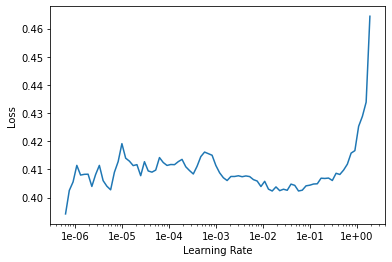

In [11]:
learn.recorder.plot()

In [0]:
learn.unfreeze()
lr = 1e-02
learn.fit(3, slice(1e-02))

epoch,train_loss,valid_loss,accuracy,time
0,0.403746,0.380812,0.799032,00:08
1,0.396900,0.382636,0.802448,00:08
2,0.392899,0.405939,0.785598,00:08


In [0]:
learn.recorder.plot()

In [38]:
interp = ClassificationInterpretation.from_learner(learn)

In [40]:
losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

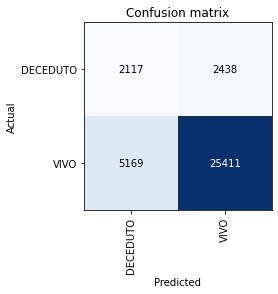

In [41]:
interp.plot_confusion_matrix()

In [45]:
interp.most_confused()

[('VIVO', 'DECEDUTO', 5169), ('DECEDUTO', 'VIVO', 2438)]

In [46]:
doc(interp.plot_top_losses)